In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

As a music enthusiast who listens across genres, I am curious about trends in musical features, such as tempo, loudness, danceability, energy, and emotional tones, and explore their relation to a song"s popularity.

For this exploration, I came across a dataset from Kaggle containing over 30,000 Songs from the Spotify API. You can access it through this link:  https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data. This dataset includes a mix of numerical and categorical data, each providing insights into different aspects of the music tracks. Specific features relevant to my analysis will be discussed in detail in subsequent sections of the project. 

In [28]:
# load the data file and take an overview 
Spotify_raw = pd.read_csv("spotify_songs.csv")
print(Spotify_raw.shape)
Spotify_raw.head()

(32833, 23)


track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

The raw data comprises 23 columns. However, not all of these columns are intuitive or relevant to the specific focus of my analysis. To ensure a focused analysis, I will drop the columns that are misleading and not directly relevant to this project.

In [29]:
# Subset only features pertinent to my analysis
irrelevant_features = ["playlist_name","playlist_id","key"]
Spotify_songs = Spotify_raw.drop(irrelevant_features, axis=1)

# Take an overview of the new DataFrame
print(Spotify_songs.shape)
Spotify_songs.head()

(32833, 20)


track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_genre playlist_subgenre  danceability  energy  loudness  mode  \
0            pop         dance pop         0.748   0.916    -2.634     1   
1            pop         dance pop         0.726   0.815    -4.969     1   
2            pop         dance pop         0.675   0.931    -3.432     0   
3            pop         dance pop         0.718   0.930    -3.778     1   
4            pop         dance pop         0.650   0.833    -4.672     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.004210    0.3570    0.693   99.972   
2       0.0742        0.0794          0.000023    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000009    0.2040    0.277  121.956   
4       0.0359        0.0803          0.000000    0.0833    0.725  123.976   

   duration_ms  
0       194754  
1       162600  
2       176616  
3       169093  
4       189052

Data Integrity Check: to check for and address any missing values in the dataset:

In [30]:
# Check for missing values
Spotify_songs.isnull().sum()
# Filter and view records with at least one missing value to determine wheather to drop them
rows_w_missing = Spotify_songs[Spotify_songs.isnull().any(axis=1)]
print(rows_w_missing)

# Remove rows with any missing values and Check the new DataFrame
Spotify = Spotify_songs.dropna()
Spotify.isnull().sum()

                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

      playlist_genre playlist_subgenre  danceability  energy  loudness  mode  \
8151             r

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

With the dataset now free from null values, I turn my attention to understanding the data types of each column, an essential step for guiding my subsequent analysis strategies.

In [31]:
#Summary of values and data types
Spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_genre            32828 non-null  object 
 8   playlist_subgenre         32828 non-null  object 
 9   danceability              32828 non-null  float64
 10  energy                    32828 non-null  float64
 11  loudness                  32828 non-null  float64
 12  mode                      32828 non-null  int64  
 13  speechiness               32828 non-null  float64
 14  acoust

The `Spotify` dataset comprises 32,828 entries, each with non-null values, featuring a mix of 12 numerical and 8 categorical columns. 

*Categorical Variables*

It"s important to note that not all columns labeled as “object"” function are typical categorical variables. A summary of these categorical columns can provide deeper insights into their nature and representation within the dataset.



In [32]:
# Summary of columns that are of "object" data type
Spotify.select_dtypes("object").describe()

track_id track_name   track_artist  \
count                    32828      32828          32828   
unique                   28352      23449          10692   
top     7BKLCZ1jbUBVqRi2FVlTVw     Poison  Martin Garrix   
freq                        10         22            161   

                track_album_id track_album_name track_album_release_date  \
count                    32828            32828                    32828   
unique                   22543            19743                     4529   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              139                      270   

       playlist_genre          playlist_subgenre  
count           32828                      32828  
unique              6                         24  
top               edm  progressive electro house  
freq             6043                       1809

`playlist_genre` and `playlist_subgenre` are categorical variables within the dataset. `edm` emerges as the most common genre with 6043 occurrences, and `progressive electro house` stands out as the most prevalent subgenre, appearing 1809 times.

I’ll then standardize the text format in the `playlist_genre` and `playlist_subgenre` columns and list out the distribution of the subgenres within each genre.

In [33]:
Spotify["playlist_genre"] = Spotify["playlist_genre"].str.upper()
Spotify["playlist_subgenre"] = Spotify["playlist_subgenre"].str.title()

# Count the values associated with each subgenre within each genre
Spotify.groupby("playlist_genre")["playlist_subgenre"].value_counts()

/var/folders/_k/ttr4ghkd6w7940qsshhw9bc00000gn/T/ipykernel_74430/2251620805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spotify["playlist_genre"] = Spotify["playlist_genre"].str.upper()
/var/folders/_k/ttr4ghkd6w7940qsshhw9bc00000gn/T/ipykernel_74430/2251620805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Spotify["playlist_subgenre"] = Spotify["playlist_subgenre"].str.title()


playlist_genre  playlist_subgenre        
EDM             Progressive Electro House    1809
                Pop Edm                      1517
                Electro House                1511
                Big Room                     1206
LATIN           Latin Hip Hop                1655
                Tropical                     1288
                Latin Pop                    1262
                Reggaeton                     948
POP             Indie Poptimism              1672
                Electropop                   1408
                Dance Pop                    1298
                Post-Teen Pop                1129
R&B             Neo Soul                     1637
                Urban Contemporary           1405
                Hip Pop                      1256
                New Jack Swing               1133
RAP             Southern Hip Hop             1674
                Gangster Rap                 1456
                Hip Hop                      1322
        

*Numerical Variables*

First, get the summary statistics for all numerical columns in `Spotify`:

In [34]:
# Summary statistics for numerical columns
Spotify.select_dtypes(["float", "int"]).describe()

track_popularity  danceability        energy      loudness  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603     -6.719529   
std           24.980476      0.145092      0.180916      2.988641   
min            0.000000      0.000000      0.000175    -46.448000   
25%           24.000000      0.563000      0.581000     -8.171250   
50%           45.000000      0.672000      0.721000     -6.166000   
75%           62.000000      0.761000      0.840000     -4.645000   
max          100.000000      0.983000      1.000000      1.275000   

               mode   speechiness  acousticness  instrumentalness  \
count  32828.000000  32828.000000  32828.000000      32828.000000   
mean       0.565737      0.107053      0.175352          0.084760   
std        0.495667      0.101307      0.219644          0.224245   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.041000      0.015100          0.000000   
50%        1.000000      0.062500      0.080400          0.000016   
75%        1.000000      0.132000      0.255000          0.004830   
max        1.000000      0.918000      0.994000          0.994000   

           liveness       valence         tempo    duration_ms  
count  32828.000000  32828.000000  32828.000000   32828.000000  
mean       0.190175      0.510556    120.883642  225796.829779  
std        0.154313      0.233152     26.903632   59836.492346  
min        0.000000      0.000000      0.000000    4000.000000  
25%        0.092700      0.331000     99.961000  187804.500000  
50%        0.127000      0.512000    121.984000  216000.000000  
75%        0.248000      0.693000    133.918250  253581.250000  
max        0.996000      0.991000    239.440000  517810.000000

The summary statistics indicate that the dataset is within expected bounds. The `track_popularity` scores are appropriately scaled between 0 and 100. Similarly, the attributes `danceability`, `energy`, `speechiness`, ` acousticness`, `instrumentalness`, `liveness` and  `valence` are all reasonably scaled between 0.0 and 1.0. The `tempo` values also fall within a plausible range for musical tracks. 

However, upon further examination and listening to the tracks with zero values for `danceability`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, and `valence`, as well as those with a `tempo` of zero, I determined that these values are not reflective of the tracks' actual characteristics. It appears that a zero may indicate a measure of absence in these musical qualities.

To maintain data integrity, I will remove tracks that have a zero value in any of the aforementioned attributes, as they likely represent instances of missing or incorrect data.






In [35]:
# List of columns to check for zero values
columns_to_check = ["danceability", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
# Remove rows where any of the columns have zero values
Spotify = Spotify.loc[~(Spotify[columns_to_check] == 0).any(axis=1)]
# Verify the result 
Spotify.select_dtypes(["float", "int"]).describe()

track_popularity  danceability        energy      loudness  \
count      20743.000000  20743.000000  20743.000000  20743.000000   
mean          39.921082      0.648098      0.705882     -7.064732   
std           24.328339      0.147764      0.192325      3.225314   
min            0.000000      0.077100      0.000175    -46.448000   
25%           21.000000      0.556000      0.580000     -8.762000   
50%           43.000000      0.665000      0.737000     -6.484000   
75%           59.000000      0.755000      0.862000     -4.738000   
max          100.000000      0.983000      1.000000      1.275000   

               mode   speechiness  acousticness  instrumentalness  \
count  20743.000000  20743.000000  20743.000000      20743.000000   
mean       0.562599      0.090234      0.165921          0.134141   
std        0.496078      0.085173      0.228707          0.270110   
min        0.000000      0.022400      0.000001          0.000001   
25%        0.000000      0.039000      0.008255          0.000029   
50%        1.000000      0.055900      0.055200          0.001010   
75%        1.000000      0.101000      0.233000          0.067700   
max        1.000000      0.865000      0.994000          0.994000   

           liveness       valence         tempo    duration_ms  
count  20743.000000  20743.000000  20743.000000   20743.000000  
mean       0.188461      0.491964    121.579946  230262.237863  
std        0.154195      0.241646     25.436437   65264.116967  
min        0.009360      0.000010     35.477000   29493.000000  
25%        0.091300      0.298000    102.970000  188308.000000  
50%        0.126000      0.490000    123.430000  218907.000000  
75%        0.247000      0.683000    130.164000  261120.000000  
max        0.996000      0.991000    239.440000  517125.000000

Given the unique characteristics of each track, I have chosen to retain all current values. However, to show the process of outlier detection, I will demonstrate using the `duration_ms` column as an example.

In [36]:
# Calculate IQR of the duration_ms
duration_Q1 = Spotify["duration_ms"].quantile(0.25)
duration_Q3 = Spotify["duration_ms"].quantile(0.75)
duration_IQR = duration_Q3 - duration_Q1

# Define outliers as any values below the lower bound (Q1 - 1.5*IQR) or above the upper bound (Q3 + 1.5*IQR)
duration_outliers = Spotify[(Spotify["duration_ms"] < (duration_Q1 - 1.5 * duration_IQR)) | (Spotify["duration_ms"] > (duration_Q3 + 1.5 * duration_IQR))]

print(duration_outliers)

                     track_id                           track_name  \
837    5WtbtCmPbr8a9TkFSCx7nF         Not over Yet - Perfecto Edit   
1004   4StaGKzRGlYxAq1eXpsMr5                  Skin - Rinzen Remix   
1075   2X485T9Z5Ly0xyaghN73ed                        Let It Happen   
1109   3PFaFVWq5wucLu6s4baj9D                                 Girl   
1129   6wMTeVootJ8RdCLNOZy5Km                      Open Eye Signal   
...                       ...                                  ...   
32673  0RRf9mjsGknc7ttUnRGcNN                         Land of Dust   
32780  3qC3qmZNDXu62hc8YbhWsy                             Dear Boy   
32807  1Ca2ELRlvACAeI7xz9c9jR                             Spaceman   
32814  7eVZbb7YlUopOeuiyRcJ7Z  Heartbeat (feat. Collin McLoughlin)   
32819  3H585qZxWJVpCIcvc0XhEP                 Dawn - Hardwell Edit   

       track_artist  track_popularity          track_album_id  \
837           Grace                20  3g4niytYg05bBFEApZ1LVs   
1004         Kidnap          

**Transformation and Modification of Numerical Variables**

1. *Mode Conversion*: the `mode` column will be converted from numerical to categorical values, replacing  `"1"` and `"0"` with `"Major"` and `"Minor"`. This conversion aligns with musical theory and will make the data more intuitive. 

In [37]:
# Convert "mode" column into a categorical feature: Major is represented by 1 and minor is 0
Spotify["mode"] = Spotify["mode"].map({1: "Major", 0: "Minor", "Major": "Major", "Minor": "Minor"}).astype("category")

# Verify the result
print(Spotify["mode"])

1        Major
2        Minor
3        Major
7        Minor
8        Major
         ...  
32826    Major
32829    Major
32830    Minor
32831    Major
32832    Minor
Name: mode, Length: 20743, dtype: category
Categories (2, object): ['Major', 'Minor']


2. *Tempo Categorization*: A new column will be created to bin `tempo` column into categories. This transformation will simplify the interpretation of the data and help the visualization of musical pace.

- Lento: 0-40 bpm
- Largo: 40-60 bpm
- Larghetto: 60-66 bpm
- Adagio: 66-76 bpm
- Andante: 76-108 bpm
- Moderato: 108–120 bpm
- Allegro: 120–168 bpm
- Presto: 168–200 bpm
- Prestissimo: >200 bpm

In [38]:
# Convert "tempo" to a categorical column based on the defined bins
tempo_bins = [0, 40, 60, 66, 76, 108, 120, 168, 200, float("inf")]
tempo_labels = ["Lento", "Largo", "Larghetto", "Adagio", "Andante", "Moderato", "Allegro", "Presto", "Prestissimo"]

Spotify["tempo_cat"] = pd.cut(Spotify["tempo"], bins=tempo_bins, labels=tempo_labels, include_lowest=True)

# Verfiy the result
Spotify[["tempo", "tempo_cat"]]

tempo tempo_cat
1       99.972   Andante
2      124.008   Allegro
3      121.956   Allegro
7      127.936   Allegro
8      127.015   Allegro
...        ...       ...
32826  112.028  Moderato
32829  128.041   Allegro
32830  127.989   Allegro
32831  128.008   Allegro
32832  127.984   Allegro

[20743 rows x 2 columns]

3. *Album Release Year & Decade Extractions*: Two new columns `Album_Release_Year` and `Album_Release_Decade`, derived from the `track_album_release_date`, will allow for a straightforward examination of trends over time.

In [39]:
# Convert the "track_album_release_date" column to a datetime object
Spotify["release_date"] = pd.to_datetime(Spotify["track_album_release_date"])

# Add a column "track_album_release_year" by extracting year from "track_album_release_date"
Spotify["Album_Release_Year"] = Spotify["release_date"].dt.year

# Define the bins for the decades
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ["1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]

# Cut the 'Album_Release_Year' into bins
Spotify['Album_Release_Decade'] = pd.cut(Spotify['Album_Release_Year'], bins=bins, labels=labels, right=False)


# Verify the result
Spotify[["release_date","Album_Release_Year","Album_Release_Decade"]]

release_date  Album_Release_Year Album_Release_Decade
1       2019-12-13                2019                2010s
2       2019-07-05                2019                2010s
3       2019-07-19                2019                2010s
7       2019-08-29                2019                2010s
8       2019-06-14                2019                2010s
...            ...                 ...                  ...
32826   2014-04-22                2014                2010s
32829   2013-03-08                2013                2010s
32830   2014-04-21                2014                2010s
32831   2014-01-01                2014                2010s
32832   2014-03-03                2014                2010s

[20743 rows x 3 columns]

The `Spotify` dataset now comprises 20,723 entries after removing tracks with zero values in key musical attributes. We can check how this change impacts the distribution of categorical variables:

In [40]:
# Summary of columns that are of "object" data type
Spotify.select_dtypes("object").describe()

track_id track_name   track_artist  \
count                    20743      20743          20743   
unique                   18180      15394           8098   
top     3eekarcy7kvN4yt5ZFzltW     Poison  Martin Garrix   
freq                         9         20            106   

                track_album_id track_album_name track_album_release_date  \
count                    20743            20743                    20743   
unique                   15189            13509                     3837   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42               85                      175   

       playlist_genre          playlist_subgenre  
count           20743                      20743  
unique              6                         24  
top               EDM  Progressive Electro House  
freq             4885                       1555

`edm` remains the most common genre within the dataset, though with 4,885 occurrences, and `progressive electro house` is still the most prevalent subgenre, appearing 1,555 times.

**Univariate Visualization**

*Histograms*

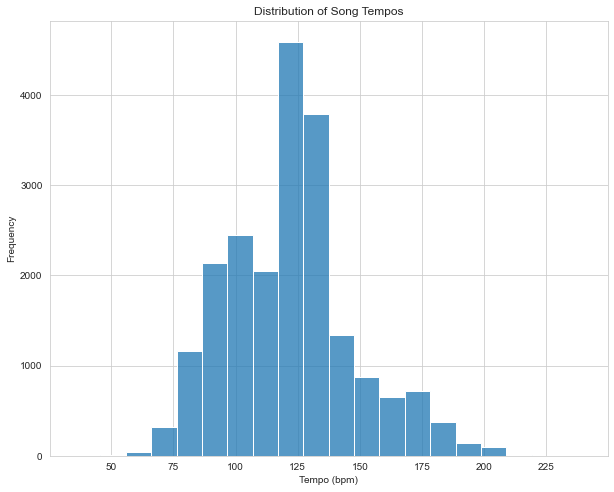

In [41]:
# Histogram for "tempo" column
plt.figure(figsize=(10, 8))

sns.histplot(Spotify["tempo"], bins=20)
plt.title("Distribution of Song Tempos")
plt.xlabel("Tempo (bpm)")
plt.ylabel("Frequency")

plt.show()

*Histogram of `tempo`* (as shown above): The distribution of tempos indicates a preference for mid-tempo music (between approximately 100 and 150 bpm) within this dataset. The distribution tapers off on both sides, suggesting fewer songs with very slow or very fast tempos. The peak around 125 bpm might indicate a common tempo range for many music genres.

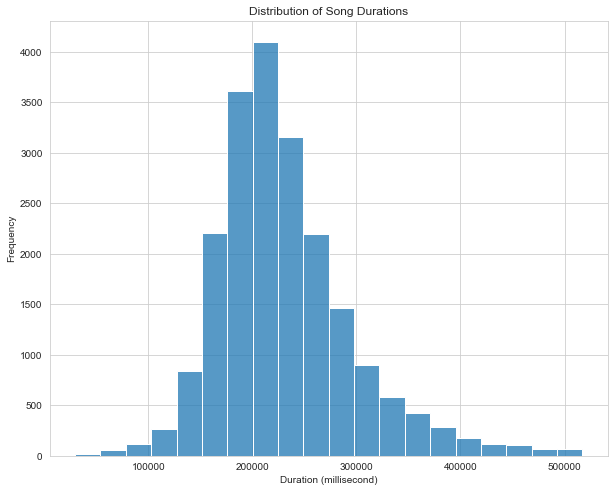

In [42]:
# Histogram for "duration_ms"
plt.figure(figsize=(10, 8))

sns.histplot(Spotify["duration_ms"], bins=20)
plt.title("Distribution of Song Durations")
plt.xlabel("Duration (millisecond)")
plt.ylabel("Frequency")

plt.show()

*Histogram of `duration_ms`* (as shown above): The distribution of song durations centers around 200,000 to 250,000 milliseconds (3:20 and just over 4:00 minutes). The histogram’s right skew indicates that while a majority of songs hover near the average length, fewer tracks significantly exceed this duration. The peak frequency around the 3 to 4-minute interval underscores this as the prevalent song length in the dataset.

*Bar Plots*

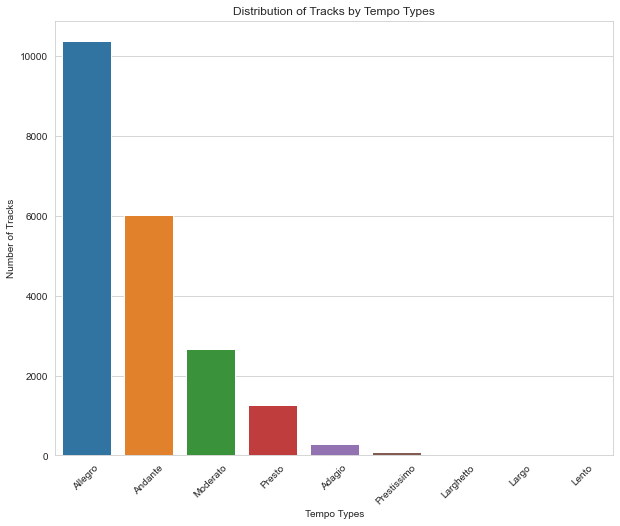

In [43]:
sns.set_style("whitegrid")
# Bar plot for "tempo_cat", shown by descending order
plt.figure(figsize=(10, 8))

tempo_plot = sns.countplot(data=Spotify, x="tempo_cat",order=Spotify["tempo_cat"].value_counts().index) 

tempo_plot.set_title("Distribution of Tracks by Tempo Types")
tempo_plot.set_xlabel("Tempo Types")
tempo_plot.set_ylabel("Number of Tracks")
plt.xticks(rotation=45)

plt.show()

*Bar Plot for `tempo_cat`*(as shown above): The Distribution of Tracks by Tempo Types shows that  “Allegro” (120–156 bpm) dominates the dataset, signifying a preference for tracks with a lively tempo. “Andante" (76–108 BPM) ranks as the second most prevalent tempo, suggesting a moderate pace is also popular among the tracks.
Those slower tempo types (“Lento”, ”Largo” and “Larghetto”) have significantly fewer tracks in this dataset. This distribution suggests an inclination toward more vigorous tempos within this music library.


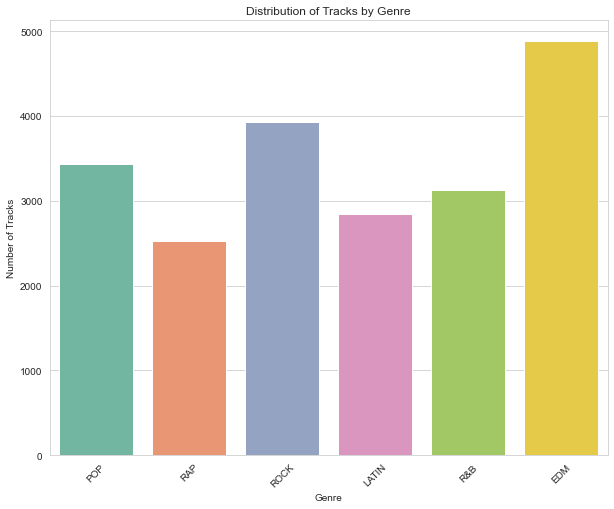

In [44]:
# Bar plots for "playlist_ genre"
plt.figure(figsize=(10, 8))

genre_plot = sns.countplot(data=Spotify, x="playlist_genre", palette="Set2")

genre_plot.set_title("Distribution of Tracks by Genre")
genre_plot.set_xlabel("Genre")
genre_plot.set_ylabel("Number of Tracks")
plt.xticks(rotation=45)

plt.show()


*Bar Plot for `playlist_ genre`*(as shown above): The Distribution of Tracks by Genre reveals that "Rock" and "EDM" genres have the highest number of tracks in the dataset. The "Rap" genre, while also popular, shows a notably lower number of tracks in comparison. The plot aligns with the previously observed inclination towards more energetic tempos, as well as the summary of categorical variables.


**Bivariate Visualization**

To begin our analysis, we'll plot a Heatmap to visualize the correlation coefficients between each pair of numerical variables. This will allow us to quickly discern the strength and direction of relationships and prioritize the most significant correlations for further visualization.

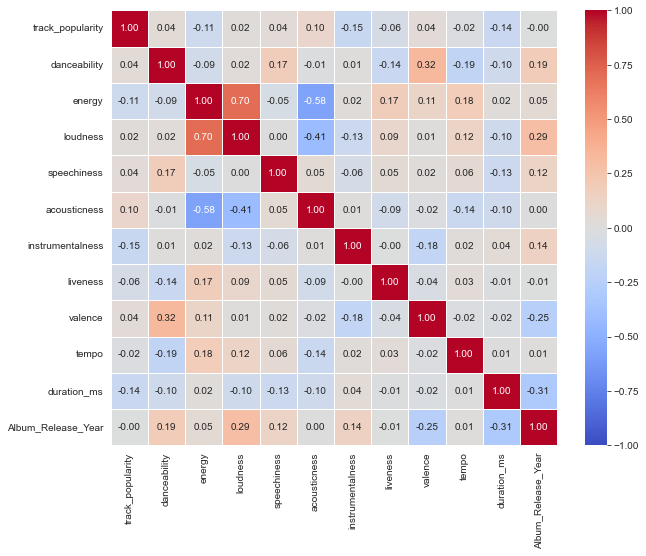

In [45]:
# use the heatmap to taken an overview of correlations between features
correlation_matrix = Spotify.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm",linewidths=.5, vmin=-1, vmax=1,fmt=".2f")
plt.show()


The strong positive correlation of 0.70 between `energy` and `loudness reflects the relationship that louder tracks, typically ranging between -60 and 0 dB, are perceived as more energetic. 

Conversely, the negative correlation of -0.58 between `energy` and `acousticness` indicates that tracks with higher energy, often louder and more dynamic, are less likely to be acoustic. 

**Scatter Plots**

To further verify the relationships we've identified, let's examine them through two scatter plots, each accompanied by its best fitting line.

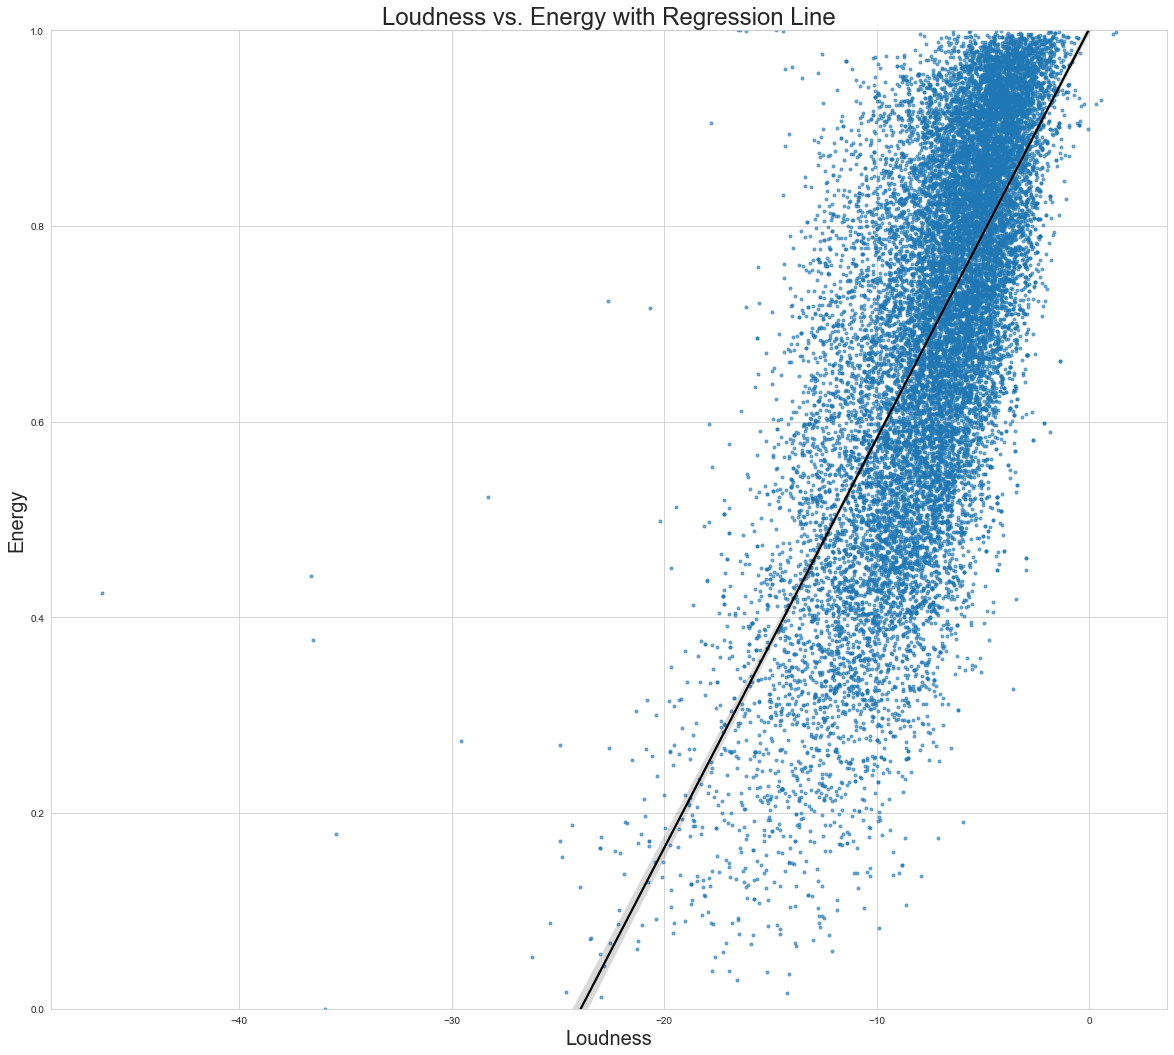

In [46]:
# Scatter plot with the regression line of loudness vs. energy 
plt.figure(figsize=(20, 18))

# Plot a line of best fit
sns.regplot(data=Spotify, x="loudness", y="energy", marker=".", scatter_kws={"alpha":0.6}, line_kws={"color": "black"})


plt.title("Loudness vs. Energy with Regression Line", fontsize=24)
plt.xlabel("Loudness", fontsize=20)
plt.ylabel("Energy", fontsize=20)

plt.ylim(0.0, 1.0)

plt.show()

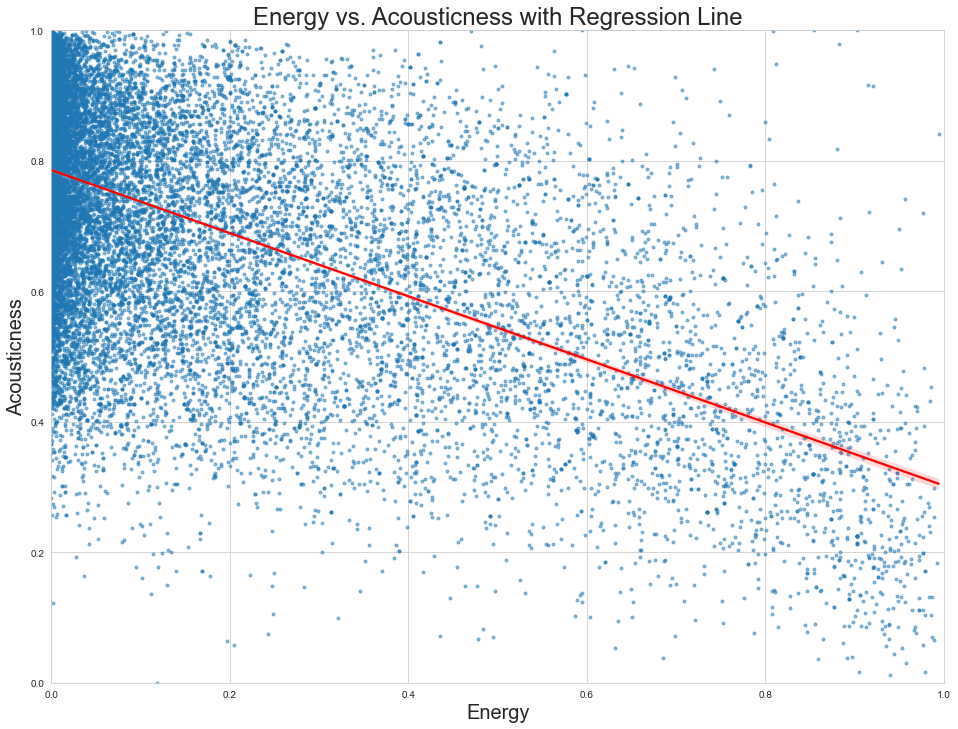

In [47]:
# Scatter plot with the regression line of energy vs. acousticness
plt.figure(figsize=(16, 12))

# Plot a line of best fit
sns.regplot(data=Spotify, x="acousticness", y="energy", marker=".", scatter_kws={"alpha":0.5}, line_kws={"color": "red"})


plt.title("Energy vs. Acousticness with Regression Line", fontsize=24)
plt.xlabel("Energy", fontsize=20)
plt.ylabel("Acousticness", fontsize=20)

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)


plt.show()


*Line Plots*

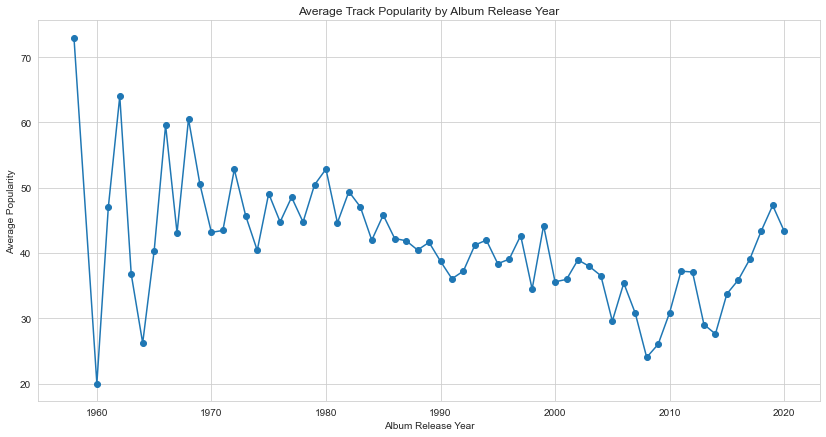

In [48]:
# Line plot for the average track popularity by album release year
popularity_by_year = Spotify.groupby("Album_Release_Year")["track_popularity"].mean()

plt.figure(figsize=(14,7))

popularity_by_year.plot(kind="line", marker="o")

plt.title("Average Track Popularity by Album Release Year")
plt.xlabel("Album Release Year")
plt.ylabel("Average Popularity")
plt.grid(True)


The line graph above demonstrates the fluctuation of average track popularity from the 1960s to 2020, with initial high popularity that dips and varies over the decades.A noticeable decline occurs in the early 2000s, reaching its lowest point in 2008, followed by a rebound beginning in the mid-2010s. This trend suggests that external economic factors, like the Great Recession in the late 2000s, may have impacted music listening habits, with a subsequent increase reflecting the growing impact of streaming services on music consumption.


**Multivariate Visualizaiton**


*Box Plots*


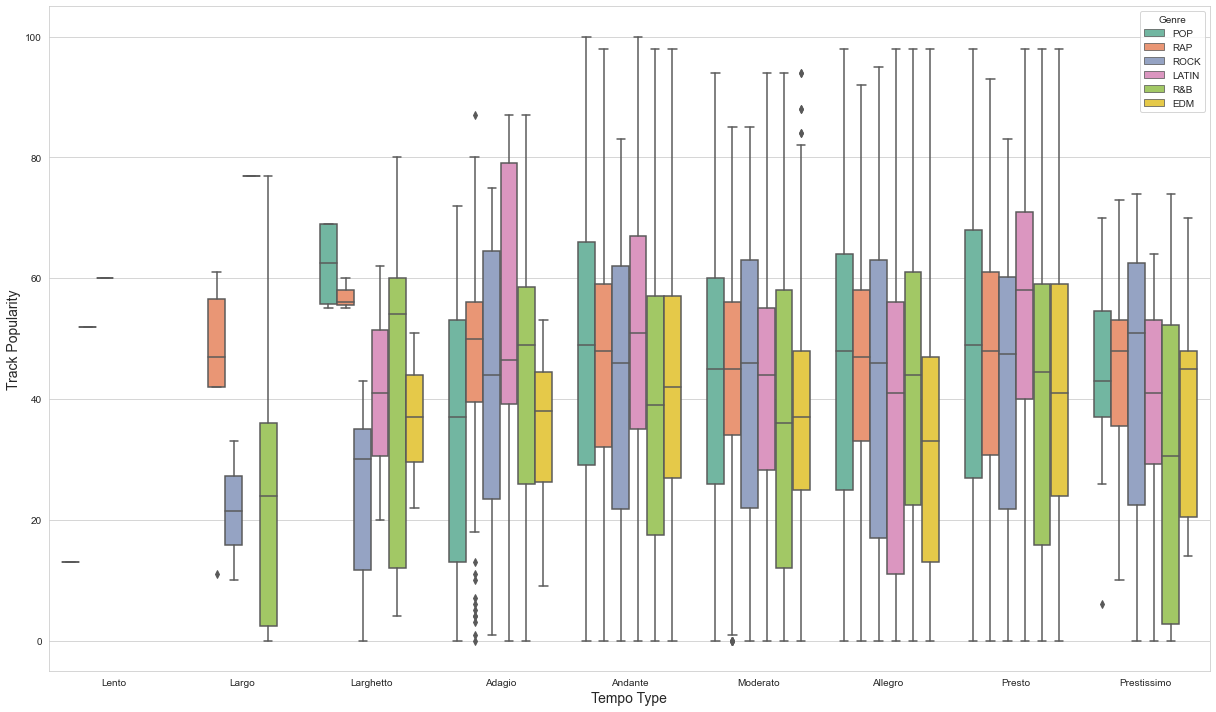

In [49]:
# Box Plot
plt.figure(figsize=(17, 10))

sns.boxplot(data=Spotify, y = "track_popularity", x ="tempo_cat", hue = "playlist_genre", palette="Set2")

plt.xlabel("Tempo Type", fontsize=14)
plt.ylabel("Track Popularity", fontsize=14)
plt.legend(title="Genre")

plt.tight_layout()
plt.show()

The box plot indicates that track popularity is influenced by both the tempo and the genre. Faster tempos like “Allegro” and “Presto” exhibit a wide range of popularities across genres, while slower tempos such as "Lento" and "Largo" have generally lower popularity scores. Genres like EDM favor faster tempos such as "Allegro," which aligns with a listener preference for high-energy music. In contrast, genres traditionally characterized by slower rhythms, like R&B, tend to show greater popularity at more leisurely tempos like "Adagio" or "Andante."

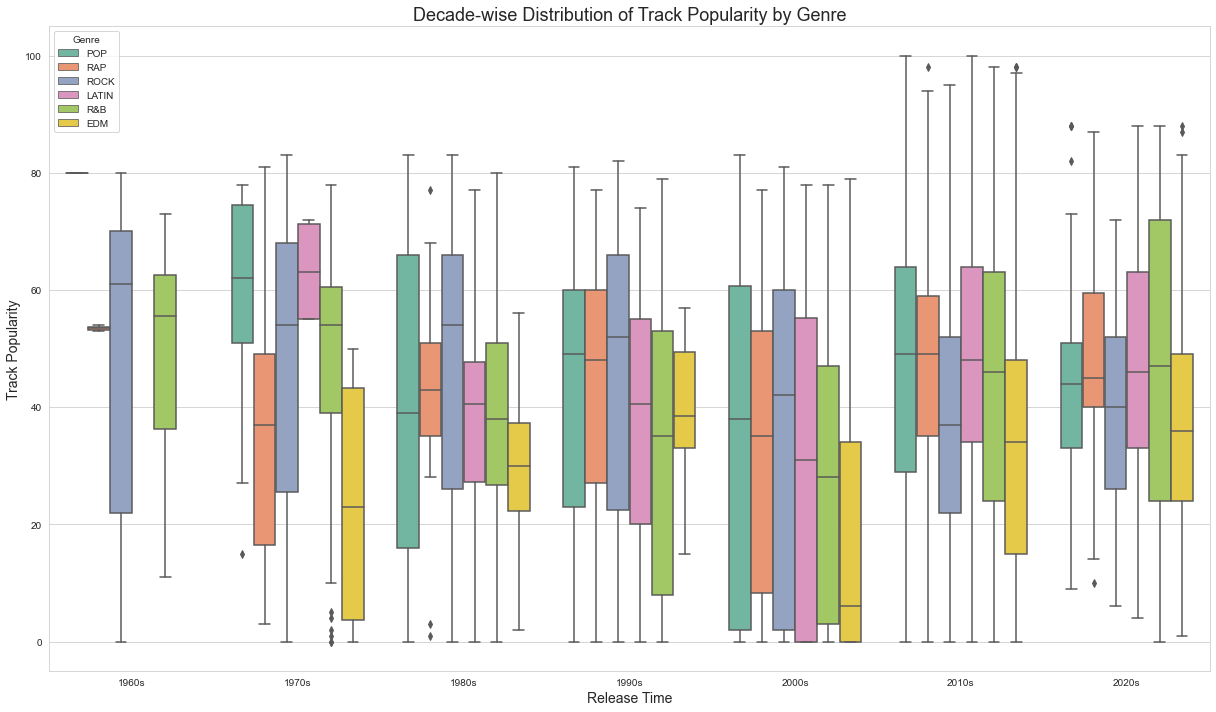

In [50]:
# Box Plot
plt.figure(figsize=(17, 10))

sns.boxplot(data=Spotify, y = "track_popularity", x ="Album_Release_Decade", hue = "playlist_genre", palette="Set2")

plt.xlabel("Release Time", fontsize=14)
plt.ylabel("Track Popularity", fontsize=14)
plt.title("Decade-wise Distribution of Track Popularity by Genre", fontsize=18)
plt.legend(title="Genre")
 
plt.tight_layout()
plt.show()

The box plot with track popularity across different decades shows the evolving landscape of musical tastes and the shifting dynamics of genre popularity over time:


**Pop** exhibits a higher median popularity in the 2010s compared to the 1980s, suggesting an increase in its mainstream appeal in recent decades.

 In contrast, **Rock** shows a lower median in the 2010s, indicating a possible decline in its popularity from its heyday in the last century.

**R&B** appears to consistently maintain higher median popularity levels than **Latin** music across the observed time frame. This could reflect a steady and strong listener base for **R&B** genres.

**Rap** has seen an increase in popularity in the 2010s, as indicated by the presence of outliers and a higher median track popularity compared to previous decades.

**EDM** points to an expanded range in popularity and a rise in outliers in the 2020s. This trend might be attributed to the genre's increased prominence, likely influenced by the rise of electronic music festivals and club culture. These insights into genre-specific popularity underscore.


*Scatter Plots*

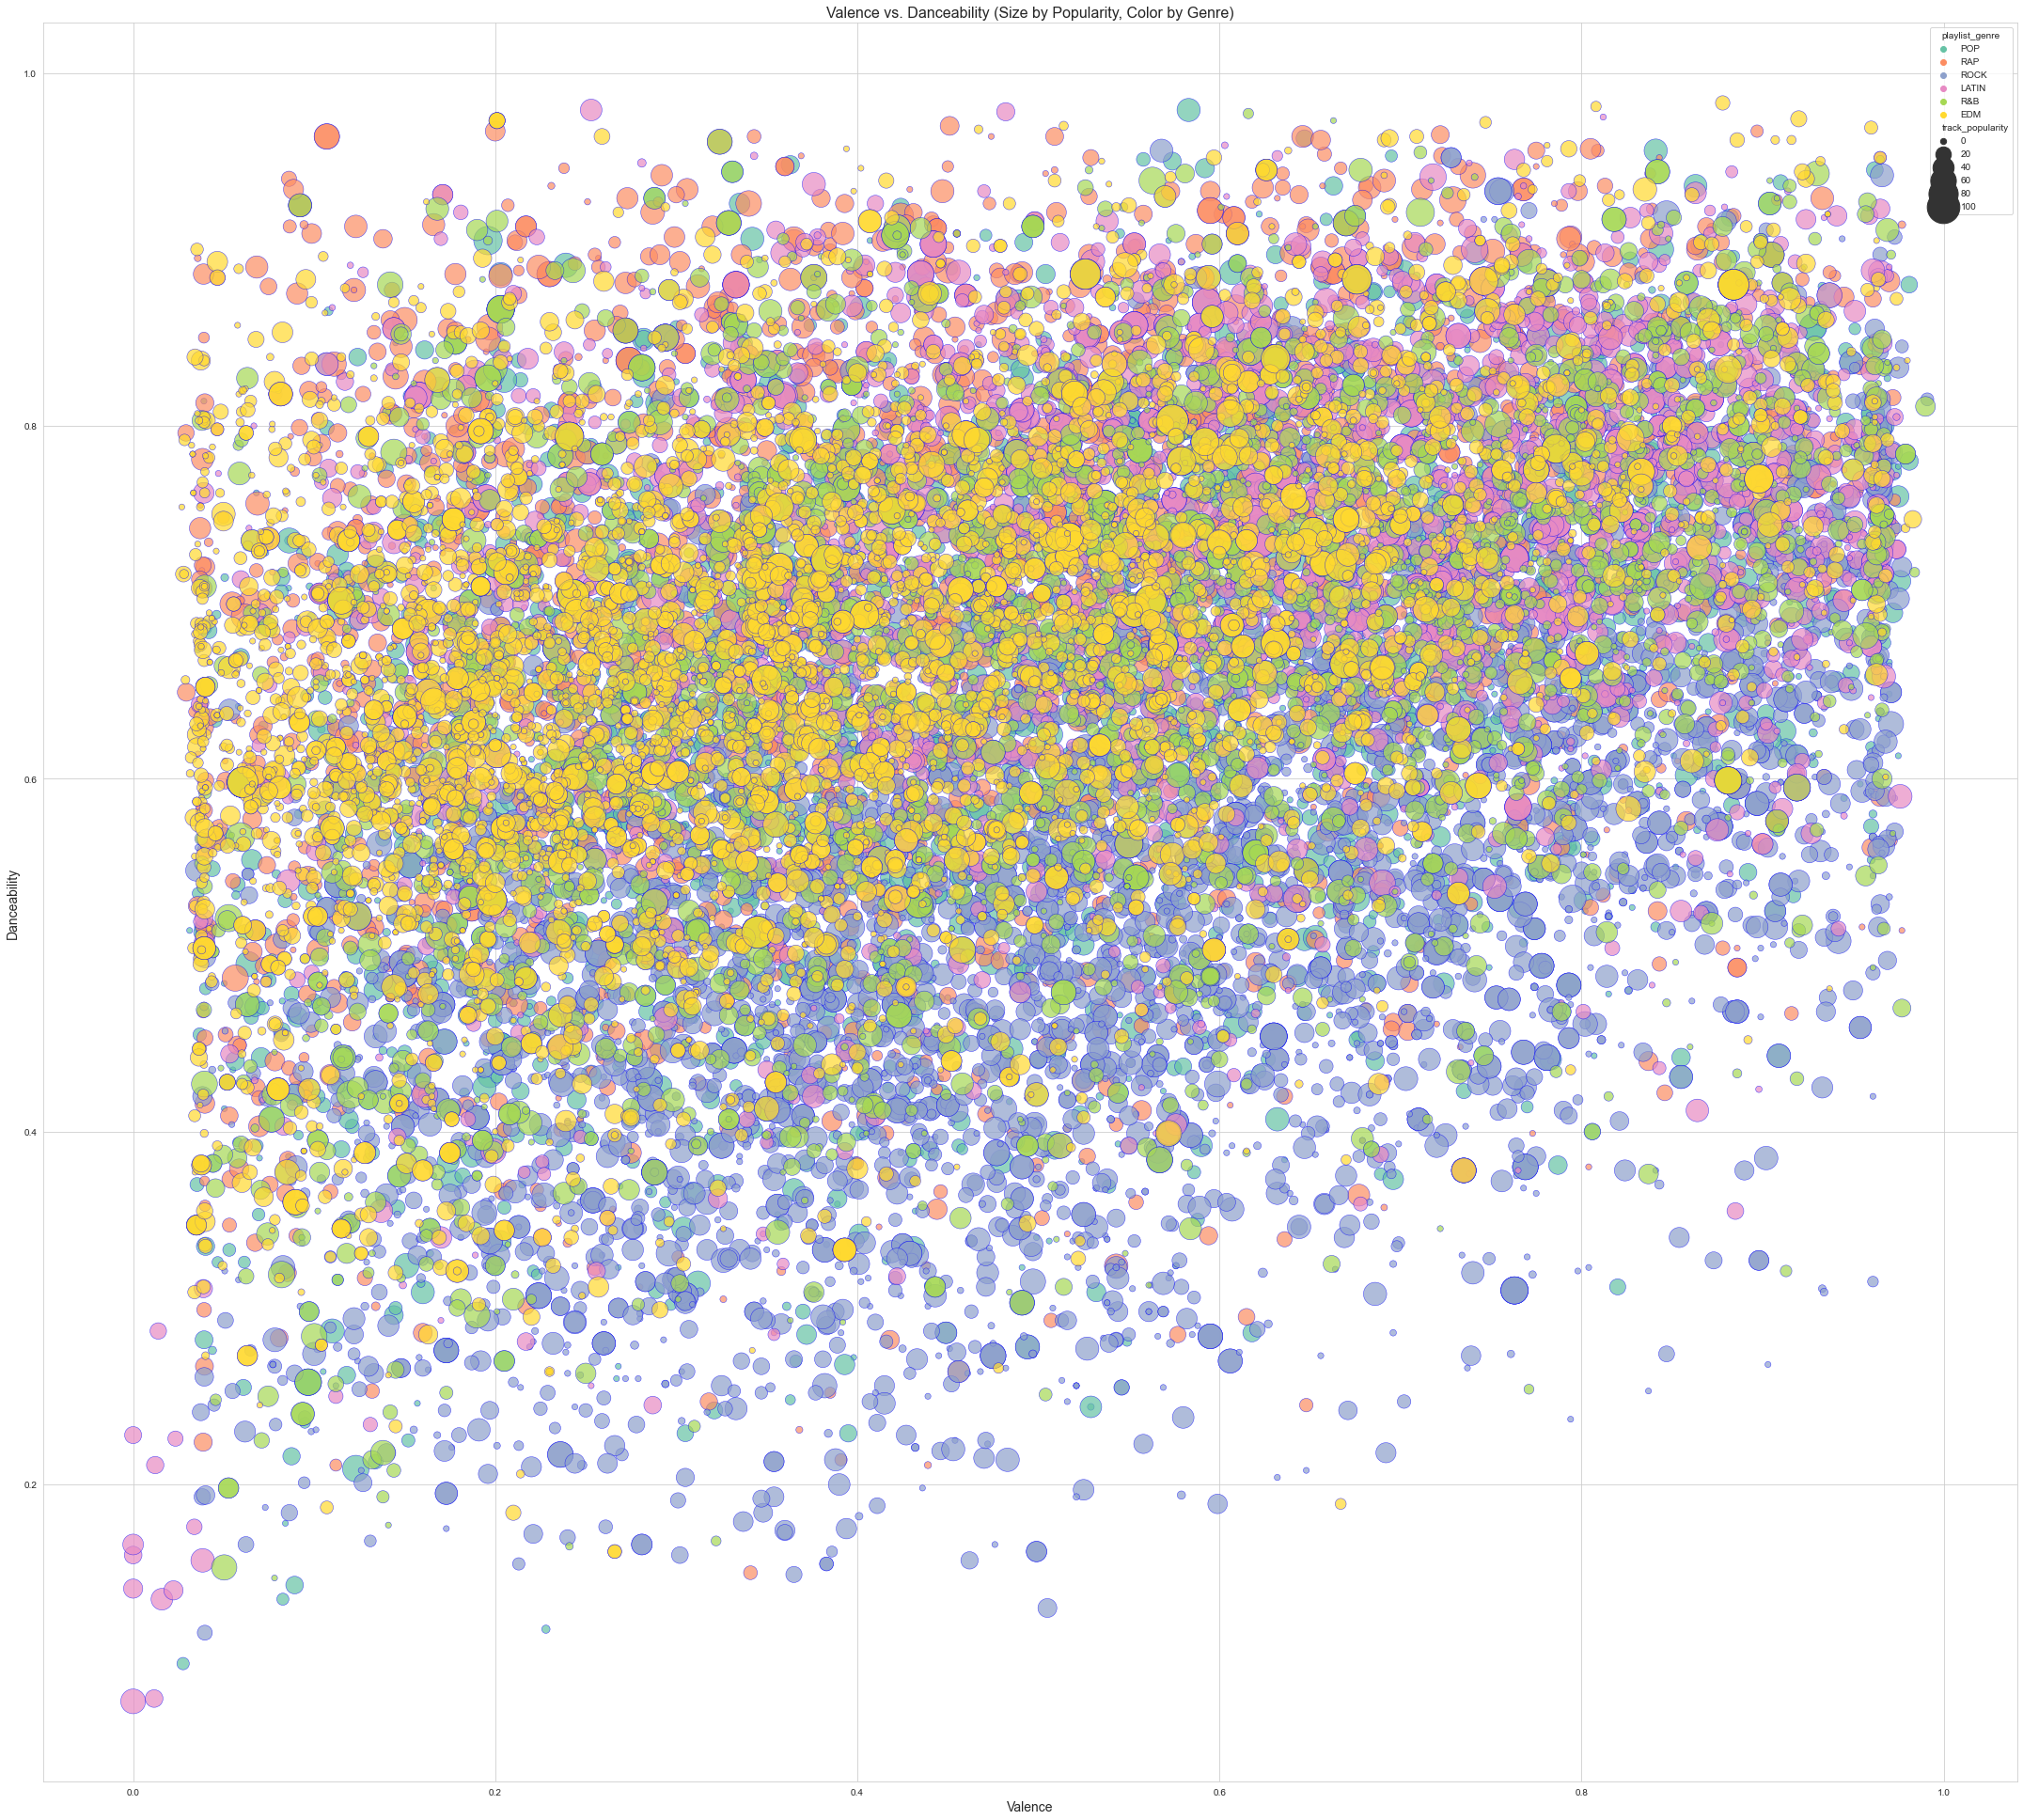

In [51]:
# Bubble plot 
plt.figure(figsize=(30, 27))
scatter = sns.scatterplot(
    data=Spotify,
    x="valence",
    y="danceability",
    size=Spotify["track_popularity"]**2/100, # apply a non-linear transformation to rescale the range of popularity, making size differences more discernible
    sizes= (40, 1200),
    hue="playlist_genre", palette="Set2", alpha= 0.7, edgecolor="b")

# Label the axes and title the plot
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Danceability", fontsize=14)
plt.title("Valence vs. Danceability (Size by Popularity, Color by Genre)", fontsize=16)



plt.tight_layout()
plt.show()


The bubble plot reveals that tracks from all genres span a broad `valence` range, indicating that both positive and negative emotions are prevalent in music preferences. Additionally, tracks with varied `danceability` are found among both the most and least popular. The mixed bubble sizes across `playlist_genre`, `valence` and `danceability` levels underscore the nuanced tastes of listeners, who embrace a diverse array of emotional and rhythmic qualities in music.

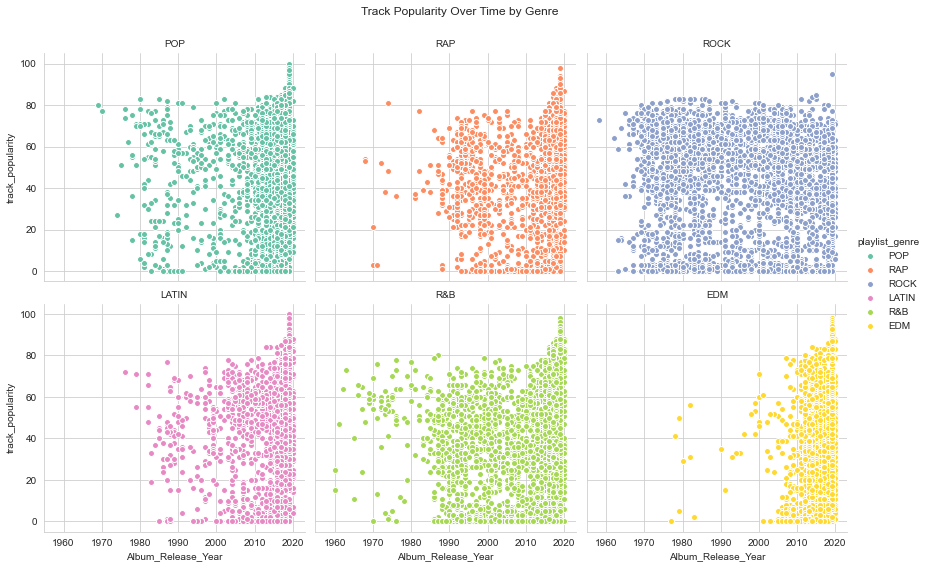

In [52]:

# This will create a grid of scatter plots
g = sns.FacetGrid(Spotify, col="playlist_genre", palette="Set2", hue="playlist_genre", col_wrap=3, height=4, sharex=True, sharey=True)

# Map the scatter plots for each "playlist_genre"
#g.map_dataframe(sns.scatterplot, x="Album_Release_Year", y="track_popularity")
g.map(plt.scatter, "Album_Release_Year", "track_popularity", edgecolor="w")

# Add the titles and adjust the spacing and the legend
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in `g`
g.fig.suptitle("Track Popularity Over Time by Genre")
g.add_legend()

# Show the plot
plt.show()

This grid of scatter plot indicates genre-specific Trends:

**Pop** shows a consistent spread of popularity scores over time, with a noticeable density of tracks in recent years.

**Rap** music demonstrates a pronounced cluster of recent tracks, indicating a surge in both production and popularity.

**Rock** maintains a steadier distribution, suggesting enduring popularity without dramatic spikes in recent times.

Both **Latin** and **R&B** show a marked increase in the number of popular tracks in the last decade.

**EDM** is characterized by a significant number of high-popularity tracks in recent years, suggesting a rise in its mainstream appeal.

There is a clear trend of a growing number of tracks across all genres in recent years, likely due to the rise of digital music platforms enhancing accessibility and distribution. **Latin**, **R&B**, and **EDM** genres, in particular, show a surge in track popularity, with many recent releases achieving high popularity scores. Conversely, the scarcity of older tracks may reflect the dataset's contemporary focus or the historical evolution of these genres. 


**Conclusion**

The exploratory data analysis of the Spotify dataset has provided several key insights into music trends and listener preferences:

- The `tempo` histograms reveal a clear preference for mid-tempo music, predominantly within the `"Allegro"` range (120–156 bpm), suggesting a listener inclination towards lively tracks.

- The distribution of song `duration_ms` shows the prevalent song length is around 3 to 4-minute, reflecting the standardization in commercial music production.

- The analysis of `track_popularity` over time showed a significant decline in the 2008 and a rebound in the mid-2010s. This trend could be linked to external factors like the Great Recession and the rise of streaming services impacting music consumption.

- The visualization of `playlist_genre` within the dataset reveals distinct shifts in musical tastes. For instance, **Pop** music has surged in mainstream appeal, while **Rock**'s popularity has relatively declined. On the other hand, genres like **Rap** and **EDM** have seen a notable rise, especially in the 2010s. These trends reflect changes in listener preferences and the significant impact of digital platforms on music distribution and consumption. The FacetGrid shows a general increase in track numbers across genres, with **Latin**, **R&B**, and **EDM** showing particularly strong growth in recent years.

- The bubble plot of `valence` vs. `danceability` across various genres uncovers a wide spectrum of emotional and rhythmic expressions in music. This diversity suggests that listeners enjoy a range of emotional content along with varying levels of `danceability` in their music choices.


I would explore the following questions in greater detail if I had more time to do research with this data:

- How have `playlist_subgenre` and their associated musical features evolved over time, and what does this reveal about changing trends in music composition and listener preferences?
- Which `playlist_subgenre` contribute most significantly to the `average_popularity` within their broader `playlist_genre`, and what factors drive this influence?
- How do the musical features of a given `Track_Artist` evolve over their career?